## Finding Roots of a Non-Linear Equation

Consider the equation: $5e^{-x} +x - 5 = 0$ . Suppose we want to solve it with accuracy tolerance $\epsilon = 10^{-6}$.

In [27]:
import numpy as np
import matplotlib.pyplot as plt

eps_tol = 1e-6

def f(x):
    return 5*np.exp(-x)+x-5

First plot the function to get an idea of the roots

Text(0, 0.5, 'f(x)')

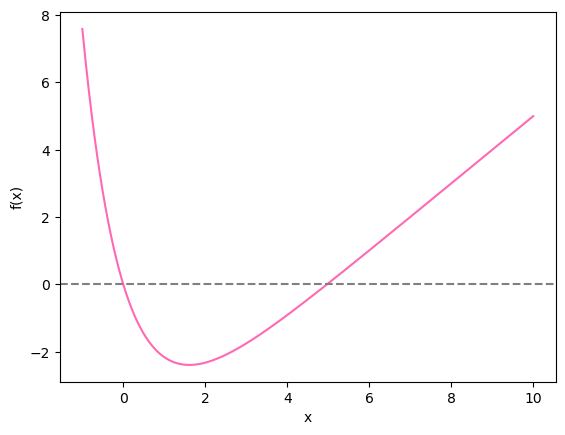

In [28]:
x = np.linspace(-1, 10, 1000)

plt.plot(x, f(x), color="hotpink")
plt.axhline(0, color="gray", linestyle="--")
plt.xlabel("x")
plt.ylabel("f(x)")

### Exercise 1
Solve using binary search. How many iterations are required?

In [21]:
x1 = 1
x2 = 10
err = np.abs(f(x1)*1000) # arbitrarily large initial error

i = 0 # counter for num iterations

while err > eps_tol:

    i += 1 

    xp = (x1+x2)/2 # midpoint of x1, x2

    fp = f(xp)
    f1 = f(x1)
    f2 = f(x2)

    # update bounds based on sign of f(x')
    # require f(x) at lower bracket to be the opposite sign as the upper bracket
    if fp > 0 and f2 > 0:
        x2 = xp
    else:
        x1 = xp

    err = np.abs(x2-x1)

print(f"iterations: {i}, value:{fp}, midpoint: {(x1+x2)/2}")    

iterations: 24, value:1.765653800944733e-07, midpoint: 4.965114146471024


### Exercise 2
Solve using relaxation. How many iterations are required?

We need to recast the equation as $x=-5e^{-x}+5$

In [25]:
def f2(x):
    return -5*np.exp(-x)+5

In [39]:
x_old = 0 # save this for error estimation
x_guess = 1
err = np.abs(f(x_guess)*1000) # arbitrarily large initial error
i = 0

while err > eps_tol:
    i += 1
    x_old = x_guess
    x_guess = f2(x_guess)
    err = np.abs(x_old  - x_guess) # error in x

print(f"iterations: {i}, value:{f(x_guess)}, x: {x_guess}")    

iterations: 7, value:-9.696728753283423e-09, x: 4.965114221697042


### Exercise 3
Solve using Newton's Method. How many iterations are required?

In [40]:
def df(x):
    return -5*np.exp(-x)+1

In [47]:
x1 = 1 
x2 = 0 # x2 is just used to store the old x1 to calculate the error with
       # initialize it to something random
err = np.abs(f(x1)*1000)
i = 0

while err > eps_tol:
    i += 1
    x2 = x1 - f(x1)/df(x1)
    err = np.abs(x2-x1)
    x1 = x2

print(f"iterations: {i}, value:{f(x2)}, x: {x2}")  

iterations: 7, value:1.5480949855373183e-12, x: -3.8694996886171165e-13


In [46]:
x1 = 5
x2 = 0
err = np.abs(f(x1)*1000)
i = 0

while err > eps_tol:
    i += 1
    x2 = x1 - f(x1)/df(x1)
    err = np.abs(x2-x1)
    x1 = x2

print(f"iterations: {i}, value:{f(x2)}, x: {x2}")  

iterations: 3, value:0.0, x: 4.965114231744276


The root we find depends on the slope of f and initial guess

### Exercise 4
Solve using Secant Method. How many iterations are required?

In [57]:
x1 = 1 
x2 = 8 # actually matters now
err = np.abs(f(x1)*1000)
i = 0

while err > eps_tol:
    i += 1

    df2 = (f(x2)-f(x1))/(x2-x1)
    x3 = x2 - f(x2)/df2

    err = np.abs(x3-x2)
    x1, x2 = x2, x3

print(f"iterations: {i}, value:{f(x3)}, x: {x3}")  

iterations: 5, value:-1.6157741811184678e-11, x: 4.965114231727535


## Fun with Circuits

### Physics background

![Newman's Exercise 6.5](rescap.png)

Consider the above circuit. Suppose the voltage $V_+$ is time-varying and sinusoidal of the form $V_+ = x_+ \exp(i \omega t)$ with $x_+$ a constant.

The resistors in the circuit can be treated using Ohm's law.
For the capacitors the charge $Q$ and voltage $V$ across them are related by the capacitor law $Q=CV$, where $C$ is the capacitance.
Differentiating both sides of this expression gives the current $I$ flowing in on one side of the capacitor and out on the other:
\begin{equation}
  I = \frac{dQ}{dt} = C \frac{dV}{dt}.
\end{equation}
Now assume the voltages at the points labeled 1, 2, and 3 are of the form $V_1 = x_1 \exp(i \omega t)$, $V_2 = x_2 \exp(i \omega t)$, and $V_3 = x_3 \exp(i \omega t)$.
If you add up the currents using Kirchoff's law that at a junction the sum of the currents in equals the sum of the currents out, you can find that the constants $x_1$,
$x_2$, and $x_3$ satisfy the equations
\begin{aligned}
\left( {1\over R_1} + {1\over R_4} + i\omega C_1 \right) x_1 - i\omega C_1 x_2
& = {x_+\over R_1}\,, \\
i\omega C_1 x_1 + \left( {1\over R_2} + {1\over R_5} + i\omega C_1 + i\omega C_2 \right) x_2 - i\omega C_2 x_3
                                                                                          & = {x_+\over R_2}\,, \\
i\omega C_2 x_2 + \left( {1\over R_3} + {1\over R_6} + i\omega C_2 \right) x_3
& = {x_+\over R_3}\,.
\end{aligned}
This is a linear system of equations for three complex numbers, $x_1$, $x_2$, and $x_3$.

### Exercise 5

We will be solving the above linear system of equations in the form $A x = b$, where $x$ is the vector $(x_1 x_2 x_3)$ and $b$ is the vector composed of the right-hand sides of the equations above.

Write a function that takes as input the list of resistance values ($R_1$ to $R_6$) and the list of capacitances ($C_1$ and $C_2$), and returns (as numpy.array) the matrix $A$. 
Write another function that takes as input the list of resistance values and the value of $x+$, and returns (as numpy.array) the vector $b$.

In [79]:
def A(Rs:np.ndarray, wCs:np.ndarray) -> np.ndarray:
    A = np.zeros((3,3)).astype(complex)
    J = 0+1j

    # Row 1 (x+/R1)
    A[0, 0] = (1/Rs[0] + 1/Rs[3] + + wCs[0]*J)
    A[0, 1] = 0-wCs[0]*J

    # Row 2 (x+/R2)
    A[1, 0] = J*wCs[0] 
    A[1, 1] = (1/Rs[1] + 1/Rs[4] + J*wCs[1])
    A[1, 2] =  -J*wCs[1]

    # Row 3 (x+/R3)
    A[2, 1] = J*wCs[1]
    A[2, 2] = (1/Rs[2] + 1/Rs[5] + J*wCs[1])

    return A

def b(Rs, xplus):
    return xplus/Rs[:3]

### Exercise 6

Use Gaussian Elimination with partial pivoting (see the code fragment below) to solve for $x_1$, $x_2$, and $x_3$. Assume the following:
\begin{align*}
R_1 &= R_3 = R_5 = 1\,\mathrm{k}\Omega, \\
R_2 &= R_4 = R_6 = 2\,\mathrm{k}\Omega, \\
C_1 &= 1\,\mu\mathrm{F},\qquad C_2 = 0.5\,\mu\mathrm{F}, \\
x_+ &= 3\,\mathrm{V},\qquad \omega = 1000~\text{rad/s}.
\end{align*}

Have your program calculate and print, at $t=0$, the amplitudes of the three voltages $|V_1|$, $|V_2|$, and $|V_3|$ and their phases (i.e. the phases of the coefficients $x_1, x_2, x_3$) in degrees.

*Notice that the matrix for this problem has complex elements. You will need to define a complex array to hold it, but your routine should be able to work with real or complex arguments.*

*Hint: the built-in abs() will compute the magnitude, and numpy.angle() will compute the phase of a complex number. You could also use polar and phase from the cmath package.*

In [143]:
import numpy as np
def GaussElim(A_in, v_in, pivot=False):
    """Implement Gaussian Elimination. This should be non-destructive for input
    arrays, so we will copy A and v to temporary variables
    It is actually clever to modify this function, rather than copy it and
    modify it in a separate function. The reason is that if you find a bug in
    the common parts, then you only need to fix it once.
    IN:
    A_in [np.array], the matrix to pivot and triangularize
    v_in [np.array], the RHS vector
    pivot [bool, default-False]: user decides if we pivot or not.
    OUT:
    x, the vector solution of A_in x = v_in """
    # copy A and v to temporary variables using copy command
    # EDIT: specify A and v as complex arrays so Python doesn't typecast elements to real numbers
    A = np.copy(A_in).astype(complex) 
    v = np.copy(v_in).astype(complex)
    N = len(v)

    for m in range(N):
        if pivot:  # This is where I modify GaussElim
            # compare the mth element to all other mth elements below
            ZeRow = m
            for mm in range(m+1, N):
                if abs(A[mm, m]) > abs(A[ZeRow, m]):
                    ZeRow = mm  # I could swap everytime I find a hit, but that
                    # would be a lot of operations. Instead, I just take note
                    # of which row emerges as the winner

            if ZeRow != m:  # now we know if and what to swap
                A[ZeRow, :], A[m, :] = np.copy(A[m, :]), np.copy(A[ZeRow, :])
                v[ZeRow], v[m] = np.copy(v[m]), np.copy(v[ZeRow])

        # Divide by the diagonal element
        div = A[m, m]
        A[m, :] /= div
        v[m] /= div

        # Now subtract from the lower rows
        for i in range(m+1, N):
            mult = A[i, m]
            A[i, :] -= mult*A[m, :]
            v[i] -= mult*v[m]

    # Backsubstitution
    # create an array of the same type as the input array
    x = np.empty(N, dtype=v.dtype)
    for m in range(N-1, -1, -1):
        x[m] = v[m]
        for i in range(m+1, N):
            x[m] -= A[m, i]*x[i]
    return x

def PartialPivot(A_in, v_in):
    """ see textbook p. 222) """
    return GaussElim(A_in, v_in, True)

In [144]:
def V(Rs, w, Cs, xplus, t):
    wCs = w*Cs
    J = 0+1j
    x = PartialPivot(A(Rs, wCs), b(Rs, xplus))
    
    V = []
    for i in range(3):
        V.append(x[i]*np.exp(w*t*J))

    return np.array(V, dtype=complex)

In [157]:
R1, R3, R5 = 1e3, 1e3, 1e3
R2, R4, R6 = 2e3, 2e3, 2e3

C1, C2 = 1e-6, 0.5e-6
w = 1000

Rs = np.array([R1, R2, R3, R4, R5, R6])
Cs = np.array([C1, C2])
xplus = 3 

V( Rs, w, Cs, xplus, 0)

array([1.81588903-1.0517024j , 0.23833544-0.77553594j,
       1.54350567-0.59394704j])

### Exercise 6


Plot the (real) voltages $|V_1|$, $|V_2|$, and $|V_3|$ as a function of time for two periods
of the oscillations. You should have 3 lines on the same plot, with labelled axes and a nice legend.

*Hint: about 256 points should be enough to obtain a nice plot.*

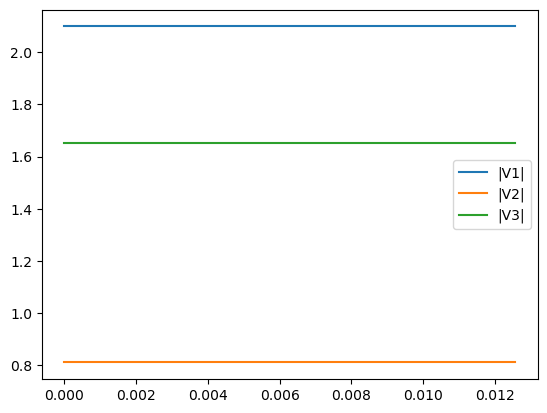

In [163]:
ts = np.linspace(0, 2*2*np.pi/w, 1000)
Vs = V(Rs, w, Cs, xplus, ts)

for i in range(3):
    plt.plot(ts, np.abs(Vs[i]))
plt.legend(["|V1|", "|V2|", "|V3|"])

This is wrong, and I can't be bothered to fix it...